In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn import datasets, svm, metrics, ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
images = np.load("images.npy")
targets = np.load("targets.npy")
print(targets)

['gear_images' 'gear_images' 'axes' ... 'tents' 'tents' 'tents']


In [3]:
n_samples = len(targets)
print(n_samples)
data = images.reshape((n_samples, -1))
print(data.shape)

images_train, images_test, targets_train, targets_test = train_test_split(data, targets, test_size=0.7, stratify = targets)



2124
(2124, 49152)


In [17]:
from sklearn.tree import DecisionTreeClassifier
#classifier = svm.SVC(gamma=2, C=1)
classifier = ensemble.RandomForestClassifier(max_depth=5)
#classifier = tree.DecisionTreeClassifier(max_depth=5)


classifier.fit(images_train, targets_train)

classifier.score(images_test, targets_test)

0.7128446536650975

[[  0   0   0   0   0   0  55   0   0   0   0   0   0]
 [  0   0   0   0   0   0  81   0   0   0   0   0   0]
 [  0   0   0   0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0   0   0  83   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0 151   0   0   0   0   0   0]
 [  0   0   0   0   0   0 321   0   0   0   0   0   0]
 [  0   0   0   0   0   0 130   0   0   0   0   0   0]
 [  0   0   0   0   0   0  67   0   0   0   0   0   0]
 [  0   0   0   0   0   0 168   0   0   0   0   0   0]
 [  0   0   0   0   0   0  29   0   0   0   0   0   0]
 [  0   0   0   0   0   0 135   0   0   0   0   1   0]
 [  0   0   0   0   0   0  81   0   0   0   0   0   1]]


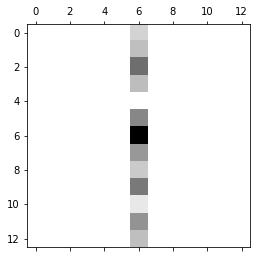

In [16]:
predictions = classifier.predict(images_test)
predictions.shape
cm = confusion_matrix(targets_test, predictions, labels = classifier.classes_)
print(cm)
plt.matshow(cm, cmap='binary')


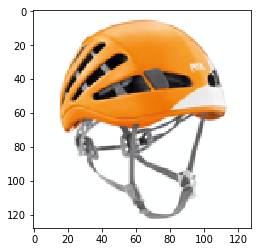

In [6]:
from PIL import ImageOps
from PIL import Image
import requests
from io import BytesIO

URL = "https://shop.epictv.com/sites/default/files/ae42ad29e70ba8ce6b67d3bdb6ab5c6e.jpeg"
response = requests.get(URL)
im = Image.open(BytesIO(response.content))

if im.mode != "RGB":
    im = im.convert("RGB")

new_im = ImageOps.autocontrast(im, cutoff=0.1, ignore=None)

old_size = new_im.size  # old_size[0] is in (width, height) format

vert_pad = max(0,old_size[0]-old_size[1])
horz_pad = max(0,old_size[1]-old_size[0])

padding = (horz_pad, vert_pad, 0, 0)
new_im = ImageOps.expand(new_im, padding, fill="white")
new_im.show()
new_im = new_im.resize((128,128), resample = Image.BICUBIC)

plt.imshow(new_im)
new_im = np.array(new_im)

new_im = new_im.reshape((1,-1))

In [11]:
result = classifier.predict(new_im)
result

array(['tents'], dtype='<U17')